2020 has been an interesting year. Over the years, I have become a fan of stock picking in the Peter Lynch view: Good companies with good management that you understand. However, it requires time and awareness. I am also getting to the age where I need to be more conservative with my money and savings.

I have been gravitating towards Dog of Dow in my Roths in my fight not to use ETFs. Check once a year, rebalance, forget till next year. Mostly safe.

In this post, I am going to compare, in a reproducible way. VFINX will be the proxy for [the market benchmark](https://www.aaii.com/model-portfolios/concepts).

What I am going to look at is:

- [Dogs of Dow](https://moneyinvestexpert.com/dogs-of-the-dow-2020)
  - After the stock market closes on the last day of the year, of the 30 stocks that make up the Dow Jones Industrial Average, select the ten stocks which have the highest dividend yield
- [Small Dogs of Dow](https://moneyinvestexpert.com/dogs-of-the-dow-2020)
  - Five lowest priced Dogs of Dow
- [Mad Dogs of the Dow](https://seekingalpha.com/article/4317962-mad-dogs-of-dow-for-2020)
  - After the stock market closes on the last day of the year, of the 30 stocks that make up the Dow Jones Industrial Average, select the ten stocks which have the highest shareholders yield
- [Dobermans Of The Dow](https://www.forbes.com/sites/michaelcannivet/2020/12/31/meet-the-2020-dobermans-of-the-dow/)
  - Rank Dow constituents by Return on Equity (ROE), keeping the top 20. 
  - Rank remaining names by Free Cash Flow Yield, keeping the top 10.

All offer a subset of the Dow Industrial. What is different is how you subset then sort.

Yes, I know they all offer returns. I just like to verify and show how I came to my results.

<!-- TEASER_END -->
Dow stocks for Jan 1, 2020 were:

In [1]:
DOW = c(
  "AAPL",
  "AXP",
  "BA",
  "CAT",
  "CSCO",
  "CVX",
  "DIS",
  "DOW",
  "GS",
  "HD",
  "IBM",
  "INTC",
  "JNJ",
  "JPM",
  "KO",
  "MCD",
  "MMM",
  "MRK",
  "MSFT",
  "NKE",
  "PFE",
  "PG",
  "RTX",
  "TRV",
  "UNH",
  "V",
  "VZ",
  "WBA",
  "WMT",
  "XOM"
)

Now to set up the population for each strategy and portfolio. Each make it easier to compair a weight file will be created. On 
ten stock strategies, selected stocks will have a weight of 1/10 or 0.1

## Dogs of Dow
### Portfolio 1

In [2]:
DOD_stock <- c("CSCO",
               "CVX",
               "DOW",
               "IBM",
               "KO",
               "MMM",
               "PFE",
               "VZ",
               "WBA",
               "XOM")
DOD_WT <- c(0,0,0,0,0.1,0.1,0,0.1,0,0,0.1,0,0,0,0.1,0,0.1,0,0,0,0.1,0,0,0,0,0,0.1,0.1,0,0.1)

## Small Dogs of Dow
### Portfolio 2

In [3]:
Small_Dog_Stocks <- c("CSCO",
                      "DOW",
                      "KO",
                      "PFE",
                      "WBA")
SM_DOD_WT <- c(0,0,0,0,0.2,0,0,0.2,0,0,0,0,0,0,0.2,0,0,0,0,0,0.2,0,0,0,0,0,0,0.2,0,0)

## Mad Dogs of Dow
### Portfolio 3

In [4]:
Mad_Dogs_Stocks  <- c("WBA",
                      "CSCO",
                      "PFE",
                      "CAT",
                      "JPM",
                      "IBM",
                      "AAPL",
                      "MRK",
                      "HD",
                      "GS")


MAD_DOD_WT <- c(0.1,0,0,0.1,0.1,0,0,0,0.1,0.1,0.1,0,0,0.1,0,0,0,0.1,0,0,0.1,0,0,0,0,0,0,0.1,0,0)

# Dobermans of Dow
### Portfolio 4

In [5]:
Dobermans_Of_Dow <-
  c("IBM",
    "WBA",
    "AXP",
    "CSCO",
    "VZ",
    "INTC",
    "MMM",
    "PFE",
    "JNJ",
    "CAT")
    
Dobermans_WT <- c(0,0.1,0.1,0,0.1,0,0,0,0,0,0.1,0.1,0.1,0,0,0,0.1,0,0,0,0.1,0,0,0,0,0,0.1,0.1,0,0)

## Initializations and get data

In [6]:
library(tidyverse, warn.conflicts = T, quietly = T)
library(tidyquant, warn.conflicts = T, quietly = T)
from <- "2020-01-01" #start date
to <- "2020-11-01" #To data is date - 1

Warning message:
"package 'tidyverse' was built under R version 3.6.3"
-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.3     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Warning message:
"package 'tibble' was built under R version 3.6.3"
Warning message:
"package 'tidyr' was built under R version 3.6.3"
Warning message:
"package 'purrr' was built under R version 3.6.3"
Warning message:
"package 'dplyr' was built under R version 3.6.3"
Warning message:
"package 'forcats' was built under R version 3.6.3"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Warning message:
"package 'tidyquant' was built under R version 3.6.3"
Warning message:
"package 'lubridate' was built under R version 3

Get Data

In [7]:
DOW_monthly_returns <- DOW %>%
  tq_get(get  = "stock.prices",
         from = from,
         to   = to) %>%
  group_by(symbol) %>%
  tq_transmute(select     = adjusted, 
               mutate_fun = periodReturn, 
               period     = "monthly", 
               col_rename = "Ra")

Get Baseline data

In [8]:
baseline_returns_monthly <- "VFINX" %>%
    tq_get(get  = "stock.prices",
           from = from,
           to   = to) %>%
    tq_transmute(select     = adjusted, 
                 mutate_fun = periodReturn, 
                 period     = "monthly", 
                 col_rename = "Rb")

Aggregate Portfolio Returns

In [9]:
DOW_returns_monthly_multi <- DOW_monthly_returns %>%
    tq_repeat_df(n = 4)


weights <- c(DOD_WT,SM_DOD_WT,MAD_DOD_WT,Dobermans_WT)
stocks <- DOW
weights_table <-  tibble(stocks) %>%
    tq_repeat_df(n = 4) %>%
    bind_cols(tibble(weights)) %>%
    group_by(portfolio)



portfolio_returns_monthly_multi <- DOW_returns_monthly_multi %>%
    tq_portfolio(assets_col  = symbol, 
                 returns_col = Ra, 
                 weights     = weights_table, 
                 col_rename  = "Ra")

Ungrouping data frame groups: symbol



Merging and Assessing Performance

In [10]:
RaRb_DOW_multiple_portfolio <- left_join(portfolio_returns_monthly_multi, 
                                     baseline_returns_monthly,
                                     by = "date")

### Performance and Stats

In [11]:
RaRb_DOW_multiple_portfolio %>%
    tq_performance(Ra = Ra, Rb = NULL, performance_fun = table.Stats)

portfolio ArithmeticMean GeometricMean Kurtosis LCLMean(0.95) Maximum Median 
1 1         -0.0211        -0.0233       -0.0813  -0.0708       0.1211  -0.0328
2 2         -0.0184        -0.0202       -0.9786  -0.0642       0.0917  -0.0285
3 3         -0.0052        -0.0073       -1.2158  -0.0533       0.0985  -0.0189
4 4         -0.0216        -0.0233       -0.6139  -0.0646       0.0887  -0.0237
  Minimum NAs Observations Quartile1 Quartile3 SEMean Skewness Stdev 
1 -0.1180 0   10           -0.0572   0.0166    0.0220 0.5504   0.0695
2 -0.1034 0   10           -0.0574   0.0320    0.0203 0.3056   0.0641
3 -0.1004 0   10           -0.0407   0.0508    0.0213 0.0348   0.0672
4 -0.1061 0   10           -0.0583   0.0150    0.0190 0.2040   0.0602
  UCLMean(0.95) Variance
1 0.0286        0.0048  
2 0.0275        0.0041  
3 0.0428        0.0045  
4 0.0214        0.0036

### CAPM

In [12]:
RaRb_DOW_multiple_portfolio %>%
    tq_performance(Ra = Ra, Rb = Rb, performance_fun = table.CAPM)

portfolio ActivePremium Alpha   AnnualizedAlpha Beta   Beta-  Beta+ 
1 1         -0.2673       -0.0249 -0.2609         0.8645 0.6761 1.3064
2 2         -0.2385       -0.0216 -0.2309         0.7518 0.5375 0.9596
3 3         -0.1051       -0.0090 -0.1025         0.8558 0.6286 0.8240
4 4         -0.2670       -0.0248 -0.2604         0.7406 0.6894 1.0121
  Correlation Correlationp-value InformationRatio R-squared TrackingError
1 0.9461      0e+00              -3.1168          0.8951    0.0858       
2 0.8929      5e-04              -1.9971          0.7973    0.1194       
3 0.9687      0e+00              -1.5198          0.9384    0.0692       
4 0.9363      1e-04              -2.6658          0.8767    0.1002       
  TreynorRatio
1 -0.2849     
2 -0.2893     
3 -0.0983     
4 -0.3322

### AnnualizedReturns

In [13]:
RaRb_DOW_multiple_portfolio %>%
    tq_performance(Ra = Ra, Rb = NULL, performance_fun = table.AnnualizedReturns)

portfolio AnnualizedReturn AnnualizedSharpe(Rf=0%) AnnualizedStdDev
1 1         -0.2463          -1.0229                 0.2408          
2 2         -0.2175          -0.9802                 0.2219          
3 3         -0.0841          -0.3612                 0.2328          
4 4         -0.2460          -1.1802                 0.2085

### Benchmark Returns

In [14]:
baseline_returns_monthly %>%
    tq_performance(Ra = Rb, Rb = NULL, performance_fun = table.AnnualizedReturns)

AnnualizedReturn AnnualizedSharpe(Rf=0%) AnnualizedStdDev
1 0.021            0.0797                  0.2635

### Graphs

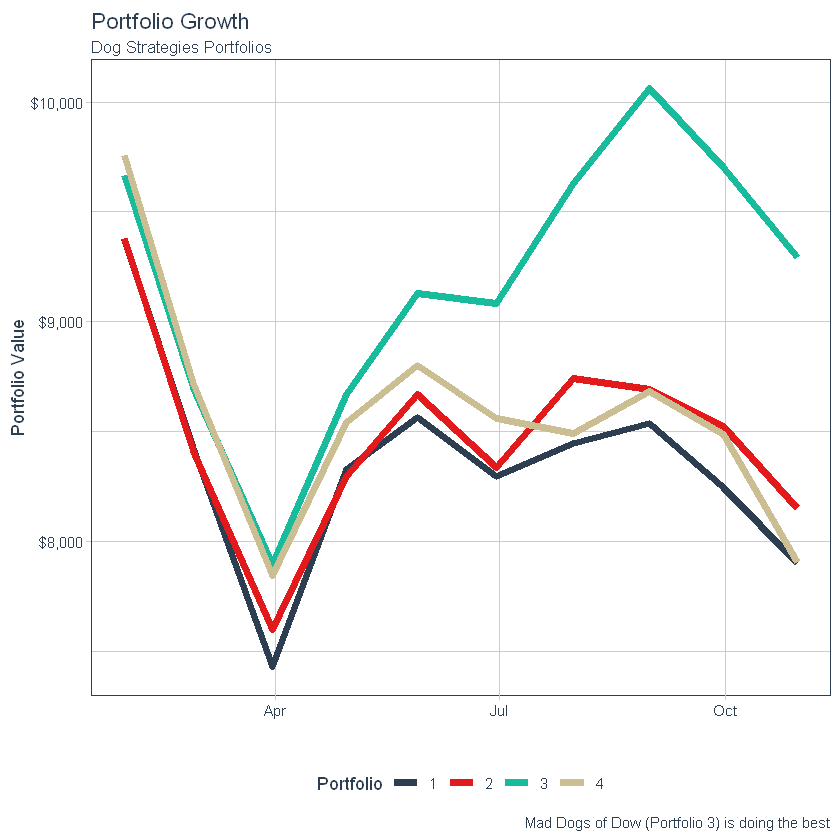

In [15]:
portfolio_growth_monthly_multi <- DOW_returns_monthly_multi %>%
    tq_portfolio(assets_col  = symbol, 
                 returns_col = Ra, 
                 weights     = weights_table, 
                 col_rename   = "investment.growth",
                 wealth.index = TRUE) %>%
    mutate(investment.growth = investment.growth * 10000)

portfolio_growth_monthly_multi %>%
    ggplot(aes(x = date, y = investment.growth, color = factor(portfolio))) +
    geom_line(size = 2) +
    labs(title = "Portfolio Growth",
         subtitle = "Dog Strategies Portfolios",
         caption = "Mad Dogs of Dow (Portfolio 3) is doing the best",
         x = "", y = "Portfolio Value",
         color = "Portfolio") +
    #geom_smooth(method = "loess",formula = "y ~ x") +
    theme_tq() +
    scale_color_tq() +
    scale_y_continuous(labels = scales::dollar)

*Disclosure*

    This material is not intended to be relied upon as a forecast, research 
    or investment advice, and is not a recommendation. Past performance is 
    not always indicative of future returns. I may or may not own stocks listed
